# RNN Demand Spain

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import os
os.chdir('/Users/gz6009/Documents/storm_test/Brain_Storm/Demand/Data/')



## Load Data

In [20]:
dataset = pd.read_excel('Load_Spain.xlsx')
out_of_sample = pd.read_excel('Load_Spain_2020.xlsx')
dataset_index = dataset.set_index('Date').index
dataset = pd.DataFrame(dataset['Actual Total Load.Total Load Value.Spain'])
dataset = dataset.values
dataset = dataset.astype('float32')


## Rescale Data + window data

In [21]:
## Rescale
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


## Dindow Data
look_back = 168
dataset_dim = []
for i in range(len(dataset)-look_back):
    a = dataset[i:(i+look_back), 0]
    dataset_dim.append(a)

dataset_dim = np.array(dataset_dim)

## Split the dataset into train/test 

In [22]:
train_size = int(len(dataset_dim) * 0.67)
test_size = len(dataset_dim) - train_size
train, test = dataset_dim[0:train_size,:], dataset_dim[train_size:len(dataset_dim),:]
print(len(train), len(test))

trainX = dataset_dim[0:len(train)]
trainY =  dataset_dim[167:len(train) + 167]

testX = dataset_dim[len(train):-167]
testY = dataset_dim[len(train) + 167 :]

11609 5718


## Reshape to get the right dimensions


In [23]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Create and fit the MLP network

In [24]:
model = Sequential()
model.add(LSTM(168, input_shape=(1, look_back)))
model.add(Dense(168, activation="relu"))    
model.add(Dense(168))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=200, batch_size=150, verbose=1)




Epoch 1/200
11609/11609 [==============================] - 1s 66us/step - loss: 0.0556 - accuracy: 0.0090
Epoch 2/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0144 - accuracy: 0.0284
Epoch 3/200
11609/11609 [==============================] - 0s 40us/step - loss: 0.0092 - accuracy: 0.0486
Epoch 4/200
11609/11609 [==============================] - 0s 38us/step - loss: 0.0083 - accuracy: 0.0455
Epoch 5/200
11609/11609 [==============================] - 0s 40us/step - loss: 0.0076 - accuracy: 0.0401
Epoch 6/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0071 - accuracy: 0.0379
Epoch 7/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0068 - accuracy: 0.0375
Epoch 8/200
11609/11609 [==============================] - 0s 38us/step - loss: 0.0064 - accuracy: 0.0431
Epoch 9/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0063 - accuracy: 0.0486
Epoch 10/200
11609/11609 [====================

11609/11609 [==============================] - 0s 39us/step - loss: 0.0038 - accuracy: 0.1495
Epoch 78/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0039 - accuracy: 0.1433
Epoch 79/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0038 - accuracy: 0.1482
Epoch 80/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0039 - accuracy: 0.1433
Epoch 81/200
11609/11609 [==============================] - 0s 38us/step - loss: 0.0038 - accuracy: 0.1461
Epoch 82/200
11609/11609 [==============================] - 0s 38us/step - loss: 0.0038 - accuracy: 0.1446
Epoch 83/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0038 - accuracy: 0.1456
Epoch 84/200
11609/11609 [==============================] - 0s 40us/step - loss: 0.0038 - accuracy: 0.1518
Epoch 85/200
11609/11609 [==============================] - 0s 41us/step - loss: 0.0038 - accuracy: 0.1512
Epoch 86/200
11609/11609 [========================

11609/11609 [==============================] - 0s 39us/step - loss: 0.0032 - accuracy: 0.1886
Epoch 154/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0032 - accuracy: 0.1854
Epoch 155/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0032 - accuracy: 0.1873
Epoch 156/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0031 - accuracy: 0.1910
Epoch 157/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0032 - accuracy: 0.1955
Epoch 158/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0032 - accuracy: 0.1891
Epoch 159/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0032 - accuracy: 0.1898
Epoch 160/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0031 - accuracy: 0.1940
Epoch 161/200
11609/11609 [==============================] - 0s 39us/step - loss: 0.0031 - accuracy: 0.1929
Epoch 162/200
11609/11609 [===============

## Plot Accuracy during training

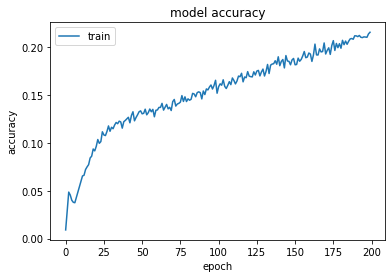

In [25]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



## Plot Loss during training

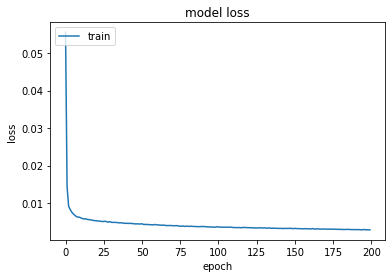

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



## Make predictions 

In [27]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)



## Change the dimension and print the Error 

In [28]:
## Change dimension
trainPredict = np.array(trainPredict)[:,0]
testPredict = np.array(testPredict)[:,0]
testY = np.array(testY)[:,0]
trainY = np.array(trainY)[:,0]
# calculate root mean squared error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
trainScore_MAE = mean_absolute_error(trainY, trainPredict)
print('Train Score: %.2f MAE' % (trainScore_MAE))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))
testScore_MAE = mean_absolute_error(testY, testPredict)
print('Test Score: %.2f MAE' % (testScore_MAE))

pd.DataFrame({'TrainScore RMSE':[trainScore], 'TestScore RMSE':[testScore], 'TrainScore MAE':[trainScore_MAE], 'TestScore MAE':[testScore_MAE]}).to_csv('score.csv',index=False)



Train Score: 387.83 RMSE
Train Score: 299.74 MAE
Test Score: 366.11 RMSE
Test Score: 288.89 MAE


## Change the Data

In [29]:
## Data
dataset = scaler.inverse_transform(dataset)
dataset = pd.DataFrame(dataset)
dataset.index = dataset_index

## Plot

/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':
/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  # Remove the CWD from sys.path while we load stuff.
/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  # This is added back by InteractiveShellApp.init_path()


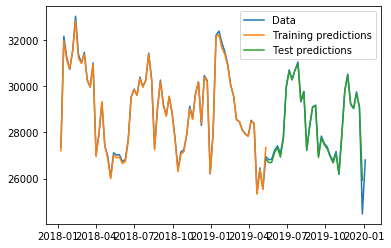

/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


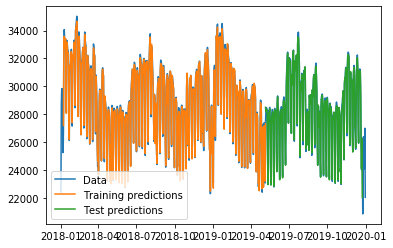

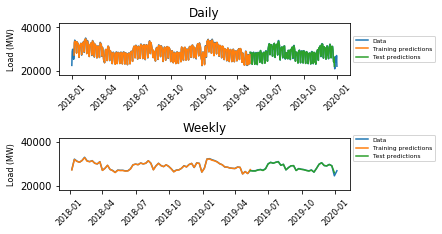

In [30]:
## PredictPlot
trainPredictPlot = pd.DataFrame(trainPredict)
trainPredictPlot.index = dataset_index[167:len(train) + 167]
testPredictPlot = pd.DataFrame(testPredict)#[0:-167])
testPredictPlot.index = dataset_index[len(train) + 167 + 1 :-167]


## Granularity Week
dataset_W = dataset.resample('W', how='mean')
trainPredictPlot_W = trainPredictPlot.resample('W', how='mean')
testPredictPlot_W = testPredictPlot.resample('W', how='mean')

# plot baseline and predictions
plt.plot(dataset_W, label = 'Data')
plt.plot(trainPredictPlot_W, label = 'Training predictions')
plt.plot(testPredictPlot_W, label = 'Test predictions')
plt.legend()
plt.show()


## Add granularity

dataset_D = dataset.resample('D', how='mean')
trainPredictPlot_D = trainPredictPlot.resample('D', how='mean')
testPredictPlot_D = testPredictPlot.resample('D', how='mean')
# plot baseline and predictions
plt.plot(dataset_D, label = 'Data')
plt.plot(trainPredictPlot_D, label = 'Training predictions')
plt.plot(testPredictPlot_D, label = 'Test predictions')
plt.legend()
plt.show()


fig, axs = plt.subplots(2)
axs[0].plot(dataset_D, label = 'Data')
axs[0].plot(trainPredictPlot_D, label = 'Training predictions')
axs[0].plot(testPredictPlot_D, label = 'Test predictions')
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1, prop={'size': 6})
for tick in axs[0].get_xticklabels():
        tick.set_rotation(45)
axs[0].xaxis.set_tick_params(labelsize=8)
axs[0].set_ylabel('Load (MW)',fontsize = 8)
axs[0].set_ylim([18000, 42000])
axs[0].title.set_text('Daily')
axs[1].plot(dataset_W, label = 'Data')
axs[1].plot(trainPredictPlot_W, label = 'Training predictions')
axs[1].plot(testPredictPlot_W, label = 'Test predictions')
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.8), ncol = 1, prop={'size': 6})
for tick in axs[1].get_xticklabels():
        tick.set_rotation(45)
axs[1].xaxis.set_tick_params(labelsize=8)
axs[1].set_ylabel('Load (MW)',fontsize = 8)
axs[1].set_ylim([18000, 42000])
axs[1].title.set_text('Weekly')
plt.subplots_adjust(left=None, bottom=0.3, right= 0.8, top=None, wspace=1, hspace=1.2)

